In [1]:
import dfBasics
import common
import encoder
import pfAdapt
import charts


Setup Complete


In [2]:
import pandas as pd
from pyspark.sql import functions

# Lib functions

# Main

In [ ]:
columns = ['CGLOBALMESSAGEID', 'CSTARTTIME', 'CENDTIME', 'CSTATUS', 'CSERVICE',\
       'CSLABILLINGMONTH', 'CSENDERPROTOCOL', 'CSENDERENDPOINTID',\
       'CINBOUNDSIZE', 'CRECEIVERPROTOCOL', 'CRECEIVERENDPOINTID', 'CSLATAT',\
       'CMESSAGETAT2', 'CSLADELIVERYTIME']
# withot 'CSLABILLINGMONTH'
def get_columns_2():
    columns = ['CGLOBALMESSAGEID', 'CSTARTTIME', 'CENDTIME', 'CSTATUS', 'CSERVICE',\
            'CSENDERPROTOCOL', 'CSENDERENDPOINTID',\
           'CINBOUNDSIZE', 'CRECEIVERPROTOCOL', 'CRECEIVERENDPOINTID', 'CSLATAT',\
           'CMESSAGETAT2', 'CSLADELIVERYTIME']
    return columns
columns = get_columns_2()
#to count messages sent
#columns = [ 'CSTARTTIME', 'CSENDERENDPOINTID']

In [3]:
sparkSession = dfBasics.getSparkSession()

In [ ]:
df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/sla_sql_data/*/*').select(columns).dropDuplicates()  

In [44]:
from pyspark.sql.functions import when, lit, col

#df = sparkSession.read.parquet('/tmp/sla_1580137124017.parquet')
#df = sparkSession.read.parquet('/tmp/sla/sla_1583136848057.parquet')
#!ls /tmp/sla/sla_1583136848057.parquet
#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/sla/sla_1581517910631.parquet')
df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/sla/sla_*.parquet').select(['CGLOBALMESSAGEID', 'year', 'month', 'day', 'hour']).filter(col('CSENDERENDPOINTID')==0)


#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/sla/sla_*.parquet').limit(1)

In [45]:
pfall = df.toPandas()

In [48]:
len(pd.unique(pfall['CGLOBALMESSAGEID']))

475

In [34]:
df.head()

Row(CGLOBALMESSAGEID=-6115189114597772327, CSTARTTIME=1579063698184, CENDTIME=1579063705174, CSTATUS=11, CSERVICE=6, CSENDERPROTOCOL=0, CSENDERENDPOINTID=998, CINBOUNDSIZE=196, CRECEIVERPROTOCOL=3, CRECEIVERENDPOINTID=1796, CSLATAT=6900, CMESSAGETAT2=6990, CSLADELIVERYTIME=1579063705084, year=2020, month=1, day=15, hour=5, minute=48, __index_level_0__=0)

In [15]:
senders = list(df.select(['CSENDERENDPOINTID']).dropDuplicates().toPandas()['CSENDERENDPOINTID']) 
#list(df4['CSENDERENDPOINTID'])
#encoder.getEncoder('CSENDERENDPOINTID').inverse_transform(senders[100])

#len(senders)
#senders[2460]
#2459

2459

In [ ]:
df.head()

In [ ]:
#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/sla_sql_data/159041*/*').select(columns).dropDuplicates() 

In [ ]:
columns = df.limit(1).toPandas().columns

In [82]:
df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/CSENDERENDPOINTID/CSENDERENDPOINTID_9.parquet')

In [83]:
pfall = df.toPandas()

In [86]:
len(pd.unique(pfall['CGLOBALMESSAGEID'])),len(pfall)

(1782425, 1782425)

# Functions

In [87]:
def dfcolumnSeries(column):
    return df.select(column).dropDuplicates()
def dfcolumnCount(column):
    return dfcolumnSeries(column).count()

In [88]:
from functools import reduce
import operator

def eval1(filteredrows):
    element = staticfeatureset.index[0]
    res = filteredrows[element].eq(staticfeatureset[element])

    for element in staticfeatureset.index:
        res = reduce(operator.and_,(res,filteredrows[element].eq(staticfeatureset[element])))
    return res

In [89]:
# find out variable columns and type of value
from pyspark.sql.functions import col

selected = ['timestamp', 'value','year','month', 'day', 'hour', 'minute']

def getDFvalueWithHash(currenthash):
    pfm = df.filter(col("hashvalue") == currenthash) \
            .withColumn('value', col('value').cast('int'))\
            .select(selected).toPandas().sort_values('timestamp').reset_index() 
    return pfm

def getDFvalueWithHashSchema(schemaid,currenthash):
    pfm = df.filter(col("hashvalue") == currenthash) \
            .filter(col("schemaid") == schemaid) \
            .withColumn('value', col('value').cast('int'))\
            .select(selected).toPandas().sort_values('timestamp').reset_index() 
    return pfm

def getIgroupHashes(igroup):
        return df.filter(col("igroup") == igroup).select(["hashvalue"]).dropDuplicates().toPandas()['hashvalue']

In [90]:
# remove columns which are variable to find related metrics
def getStaticFeatures(_hash):
    allcolumns = filteredrows[filteredrows['hashvalue'] == _hash].columns
    skipcolumns = ['timestamp', 'value',  'hashvalue', 'igroup', 'inode', 'year', 'month', 'day', 'hour', 'minute']
    featurecolumns = allcolumns[~allcolumns.isin(skipcolumns)]
    featurecolumns = pfAdapt.getVariableUniqueColums(filteredrows[featurecolumns])
    staticfeatureset = filteredrows[filteredrows['hashvalue'] == _hash][featurecolumns].iloc[0]
    return staticfeatureset

# Info

In [ ]:
def getDFMin(column):
    row1 = df.agg({column: "min"}).collect()[0]
    return(row1["min(" + column + ")"])

def getDFMax(column):
    row1 = df.agg({column: "max"}).collect()[0]
    return(row1["max(" + column + ")"])
    
dfminStart = getDFMin("CSTARTTIME")
dfmaxStart = getDFMax("CSTARTTIME")

#dfminEnd = getDFMin("CENDTIME")
#dfmaxEnd = getDFMax("CENDTIME")

dfrowCount     = df.count()
dfcolumnCount  = len(df.columns)

#numbermessages = df.select('CGLOBALMESSAGEID').dropDuplicates().count() 

In [ ]:
dfminStart

In [ ]:
def printMinMaxDate(prefix,dfminTimestamp,dfmaxTimestamp):
    print(prefix + ': min:',common.date(float(dfminTimestamp) / 1e3), 'max:', common.date(float(dfmaxTimestamp) / 1e3))
    
printMinMaxDate('CSTARTTIME', dfminStart,dfmaxStart)    
#printMinMaxDate('CENDTIME', dfminEnd,dfmaxEnd) 
print('rows#:',dfrowCount,'columns#:',dfcolumnCount)
#print('messages#:',numbermessages)

In [ ]:
# B Step2
#pfall = df.limit(100000).toPandas() 
pfall = df.toPandas() 

In [ ]:
from datetime import time
import datetime as dt
import calendar
import pytz
de = pytz.timezone('Europe/Berlin')

# long timestamp
def date(x):
    return  dt.datetime.fromtimestamp(float(x) / 1e3, tz=de)


def adddatecolumns(data,pf,column) :
    data['year'] = pf[column].apply(lambda x: date(x).date().year)
    data['month'] = pf[column].apply(lambda x: date(x).date().month)
    data['day'] = pf[column].apply(lambda x: date(x).date().day)
    data['hour'] = pf[column].apply(lambda x: date(x).time().hour)
    data['minute'] = pf[column].apply(lambda x: date(x).time().minute)
    #data['second'] = pf[column].apply(lambda x: x.time().second)
    #data['microsecond'] = pf[column].apply(lambda x: x.time().microsecond)

def converttimestampcolumnn(pf,tsc) :
    pf[tsc] = pf[tsc].apply(lambda x: dt.datetime.fromtimestamp(float(x) / 1e3))

In [ ]:
#dt.datetime.fromtimestamp(float(pfall.iloc[0]['CSTARTTIME']) / 1e3)

#date(pfall.iloc[0]['CSTARTTIME'])
#date(1579064281477).date().year
del(pfall['year'])

In [ ]:
def astype(pfall,selected,newtype):
    for each in selected:
        pfall[each] = pfall[each].astype(newtype)
        
selected =  ['CSENDERENDPOINTID']       
astype(pfall,selected,str)        


# B

In [ ]:
pfall = df.toPandas() 

In [ ]:
#B
selected = [ 'CSTATUS', 'CSERVICE',\
        'CSENDERPROTOCOL', 'CSENDERENDPOINTID',\
        'CRECEIVERPROTOCOL', 'CRECEIVERENDPOINTID']

astype(pfall,selected,str) 
encoder.encode(pfall,selected)
astype(pfall,['CSTARTTIME','CENDTIME','CSLATAT','CMESSAGETAT2','CSLADELIVERYTIME','CINBOUNDSIZE'] ,int) 
#del(pfall['CSLABILLINGMONTH'])
pfall['CGLOBALMESSAGEID'] = pfall['CGLOBALMESSAGEID'].apply(hash)
pfall = pfall.drop_duplicates()

In [ ]:
def getCountDF(pf,column,hashes):
    dft = pd.DataFrame(columns=[column, 'count'])
    i=0
    for hash in hashes:
        pfall=pf[pf[column] == hash]
        num=len(pfall)
        if num > 1:
            dft.loc[i] = [hash] + [num]
            i=i+1
    return dft.sort_values('count')

def usedcolumns(tb,row):
    col = []
    for column in tb.columns:
        if tb.iloc[row][column] == None :
            col.append(column)
    return col

def diffcolumns(tb):
    col = []
    for column in tb.columns:
        if tb.iloc[0][column] != tb.iloc[1][column] :
            col.append(column)
    return col

In [ ]:

ac = pd.unique(pfall['CGLOBALMESSAGEID'])
tt = getCountDF(pfall,'CGLOBALMESSAGEID',ac)

In [ ]:
len(tt)
#tt[tt['count'] > 2]

In [ ]:
#len(pd.unique(pfall['CGLOBALMESSAGEID'])),len(pfall)
#tt[tt['count'] > 1]
#tt
#pfall[pfall['CGLOBALMESSAGEID'] == ac[0]]
#usedcolumns(tb,0)
#usedcolumns(tb,1)
#tb = pfall[pfall['CGLOBALMESSAGEID'] == tt.iloc[300]['CGLOBALMESSAGEID']]

  
def printtt():    
    for index, row in tt.iterrows():
        print(row['CGLOBALMESSAGEID'])
        tb = pfall[pfall['CGLOBALMESSAGEID'] == row['CGLOBALMESSAGEID']]
        print(diffcolumns(tb))
    
tb = pfall[pfall['CGLOBALMESSAGEID'] == tt.iloc[1]['CGLOBALMESSAGEID']]
tbindex = tb.index[1]
pfall.loc[tbindex]['CGLOBALMESSAGEID']
if pfall.loc[tbindex]['CSLADELIVERYTIME'] < 0 :
        print("remove " + pfall.loc[tbindex]['CGLOBALMESSAGEID'])
        pfall = pfall.drop(tbindex)


In [ ]:
def printtt():    
    col = []
    for index, row in tt.iterrows():
        tb = pfall[pfall['CGLOBALMESSAGEID'] == row['CGLOBALMESSAGEID']]
        for bindex, brow in tb.iterrows():
            if pfall.loc[bindex]['CSLADELIVERYTIME'] < 0 :
                #print (str(index) + ' ' + str(bindex))
                col.append(bindex)
    return col

col = printtt()   
pfall = pfall.drop(col)

In [ ]:
#pfall[pfall['CGLOBALMESSAGEID'] == tt.iloc[1]['CGLOBALMESSAGEID']]
#tt
pfall.head()
#pfall.dtypes
#
#pfall[(pfall['outcome'] == 0) & (pfall['CSTATUS'] == 'PENDING')]
#pfall[(pfall['outcome'] == 0)]

In [ ]:
pfall[pfall['CGLOBALMESSAGEID'] == tt.iloc[0]['CGLOBALMESSAGEID']].iloc[0]['CGLOBALMESSAGEID'], \
pfall.loc[10468]['CGLOBALMESSAGEID']


#pfall.loc[tt.loc[1]['index']]['CGLOBALMESSAGEID'], tt.loc[1]['CGLOBALMESSAGEID']
#pfall.loc[tt.loc[1]['index']], tt.loc[1]
#len(pfall)
#len(pfall['CGLOBALMESSAGEID'].drop_duplicates()), len(pfall)
#tt

In [ ]:
encoder.encode(pfall,selected)

In [ ]:
selected = [  'CSENDERENDPOINTID', 'CRECEIVERENDPOINTID']

astype(pfall,selected,str) 
encoder.encode(pfall,selected)
#astype(pfall,['CSTARTTIME','CENDTIME','CSLATAT','CMESSAGETAT2','CSLADELIVERYTIME','CINBOUNDSIZE'] ,int) 
#del(pfall['CSLABILLINGMONTH'])
pfall['CGLOBALMESSAGEID'] = pfall['CGLOBALMESSAGEID'].apply(hash)
pfall = pfall.drop_duplicates()

In [ ]:
# convert timestamp to datetime and add column date
#import calendar
##import pytz
#de = pytz.timezone('Europe/Berlin')
adddatecolumns(pfall,pfall,'CSTARTTIME')

In [ ]:
pfall = pfall.assign(outcome=(~( ((pfall['CSTATUS'] == 'PENDING') & (pfall['CSERVICE'] == 'InvoicePortal')) | ((pfall['CSTATUS'] == 'PENDING') & (pfall['CSERVICE'] == 'IDS')) | (pfall['CSTATUS'] == 'SUCCESS') | (pfall['CSTATUS'] == 'SUCCESS_DOWNLOADED') | (pfall['CSTATUS'] == 'SUCCESS_POLLQUEUE'))).astype(int))

In [ ]:
astype(pfall,['CSTARTTIME'] ,int) 

In [ ]:
#pfall.to_parquet('/tmp/msgsenders_0702.parquet', engine='fastparquet', compression='GZIP')

In [ ]:
#pd.read_parquet('/tmp/msgsenders.parquet', engine='fastparquet')

In [74]:
## Setup charts
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

def get_ym_string(a,b) :
    return a + "-" + b
    #return a.join(["-",b]) 

def get_ym(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    return a,b

def get_ymd(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    c = mdcountsall.index.get_level_values(2).astype(str)
    return a,b,c

def get_ymd_string(a,b,c) :
    return a + "-" + b + "-" + c 

def get_ymdh(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    c = mdcountsall.index.get_level_values(2).astype(str)
    d = mdcountsall.index.get_level_values(3).astype(str)
    return a,b,c,d

def get_ymdh_string(a,b,c,d) :
    return a + "-" + b + "-" + c + "-" + d

def createData_ym(pfall,month) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['month'] == month)].groupby(['year','month'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month'])['year'].count()    
    a,b = get_ym(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ym_string(a,b)
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2

def createData(pfall,month) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['month'] == month)].groupby(['year','month','day','hour'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day','hour'])['year'].count()    
    a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(a,b,c,d)
    data2['outcome'] =  mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int)

    #for pivot table
    data2['hours'] =  d.astype(int) 
    data2['days']  =  c.astype(int) 
    return data2

def createData_ymd(pfall,month) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['month'] == month)].groupby(['year','month','day'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day'])['year'].count()    
    a,b,c = get_ymd(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymd_string(a,b,c)
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2

def label(graph,skip,rot) :
    for ind, label in enumerate(graph.get_xticklabels()):
        if ind % skip == 0:  # every 10th label is kept
            label.set_visible(True)
            label.set_rotation(rot)
        else:
            label.set_visible(False)

def createBarplot(md,fx,fy,fontscale,title="") :
    sns.set(style='whitegrid', palette='muted', font_scale=fontscale)
    plt.figure(figsize=(fx,fy))
    plt.title(title)
    ax = sns.barplot(x=md['date'], y=md['outcome'], data=md)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
    plt.tight_layout()
    plt.show()
    return ax

## heatmap
def createHeatmap(piv,title="") :
    plt.figure(figsize=(24,8))
    plt.title(title)
    ax = sns.heatmap(piv, square=True)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 )
    plt.tight_layout()
    plt.show()
    return ax

Setup Complete


In [75]:
createData(pfall,0)

,date,outcome,hours,days
0,2019-10-29-11,2,11,29
1,2019-10-30-11,2,11,30
2,2019-10-31-11,2,11,31
3,2019-11-1-11,2,11,1
4,2019-11-2-11,2,11,2
...,...,...,...,...
282,2021-2-3-6,1,6,3
283,2021-2-16-17,2,17,16
284,2021-2-19-3,1,3,19
285,2021-3-2-7,1,7,2


In [ ]:
#pfall.head()
pfall[pfall['CGLOBALMESSAGEID'] == '2af51910-9e8b-11ea-aad1-6c31ac1e100c']

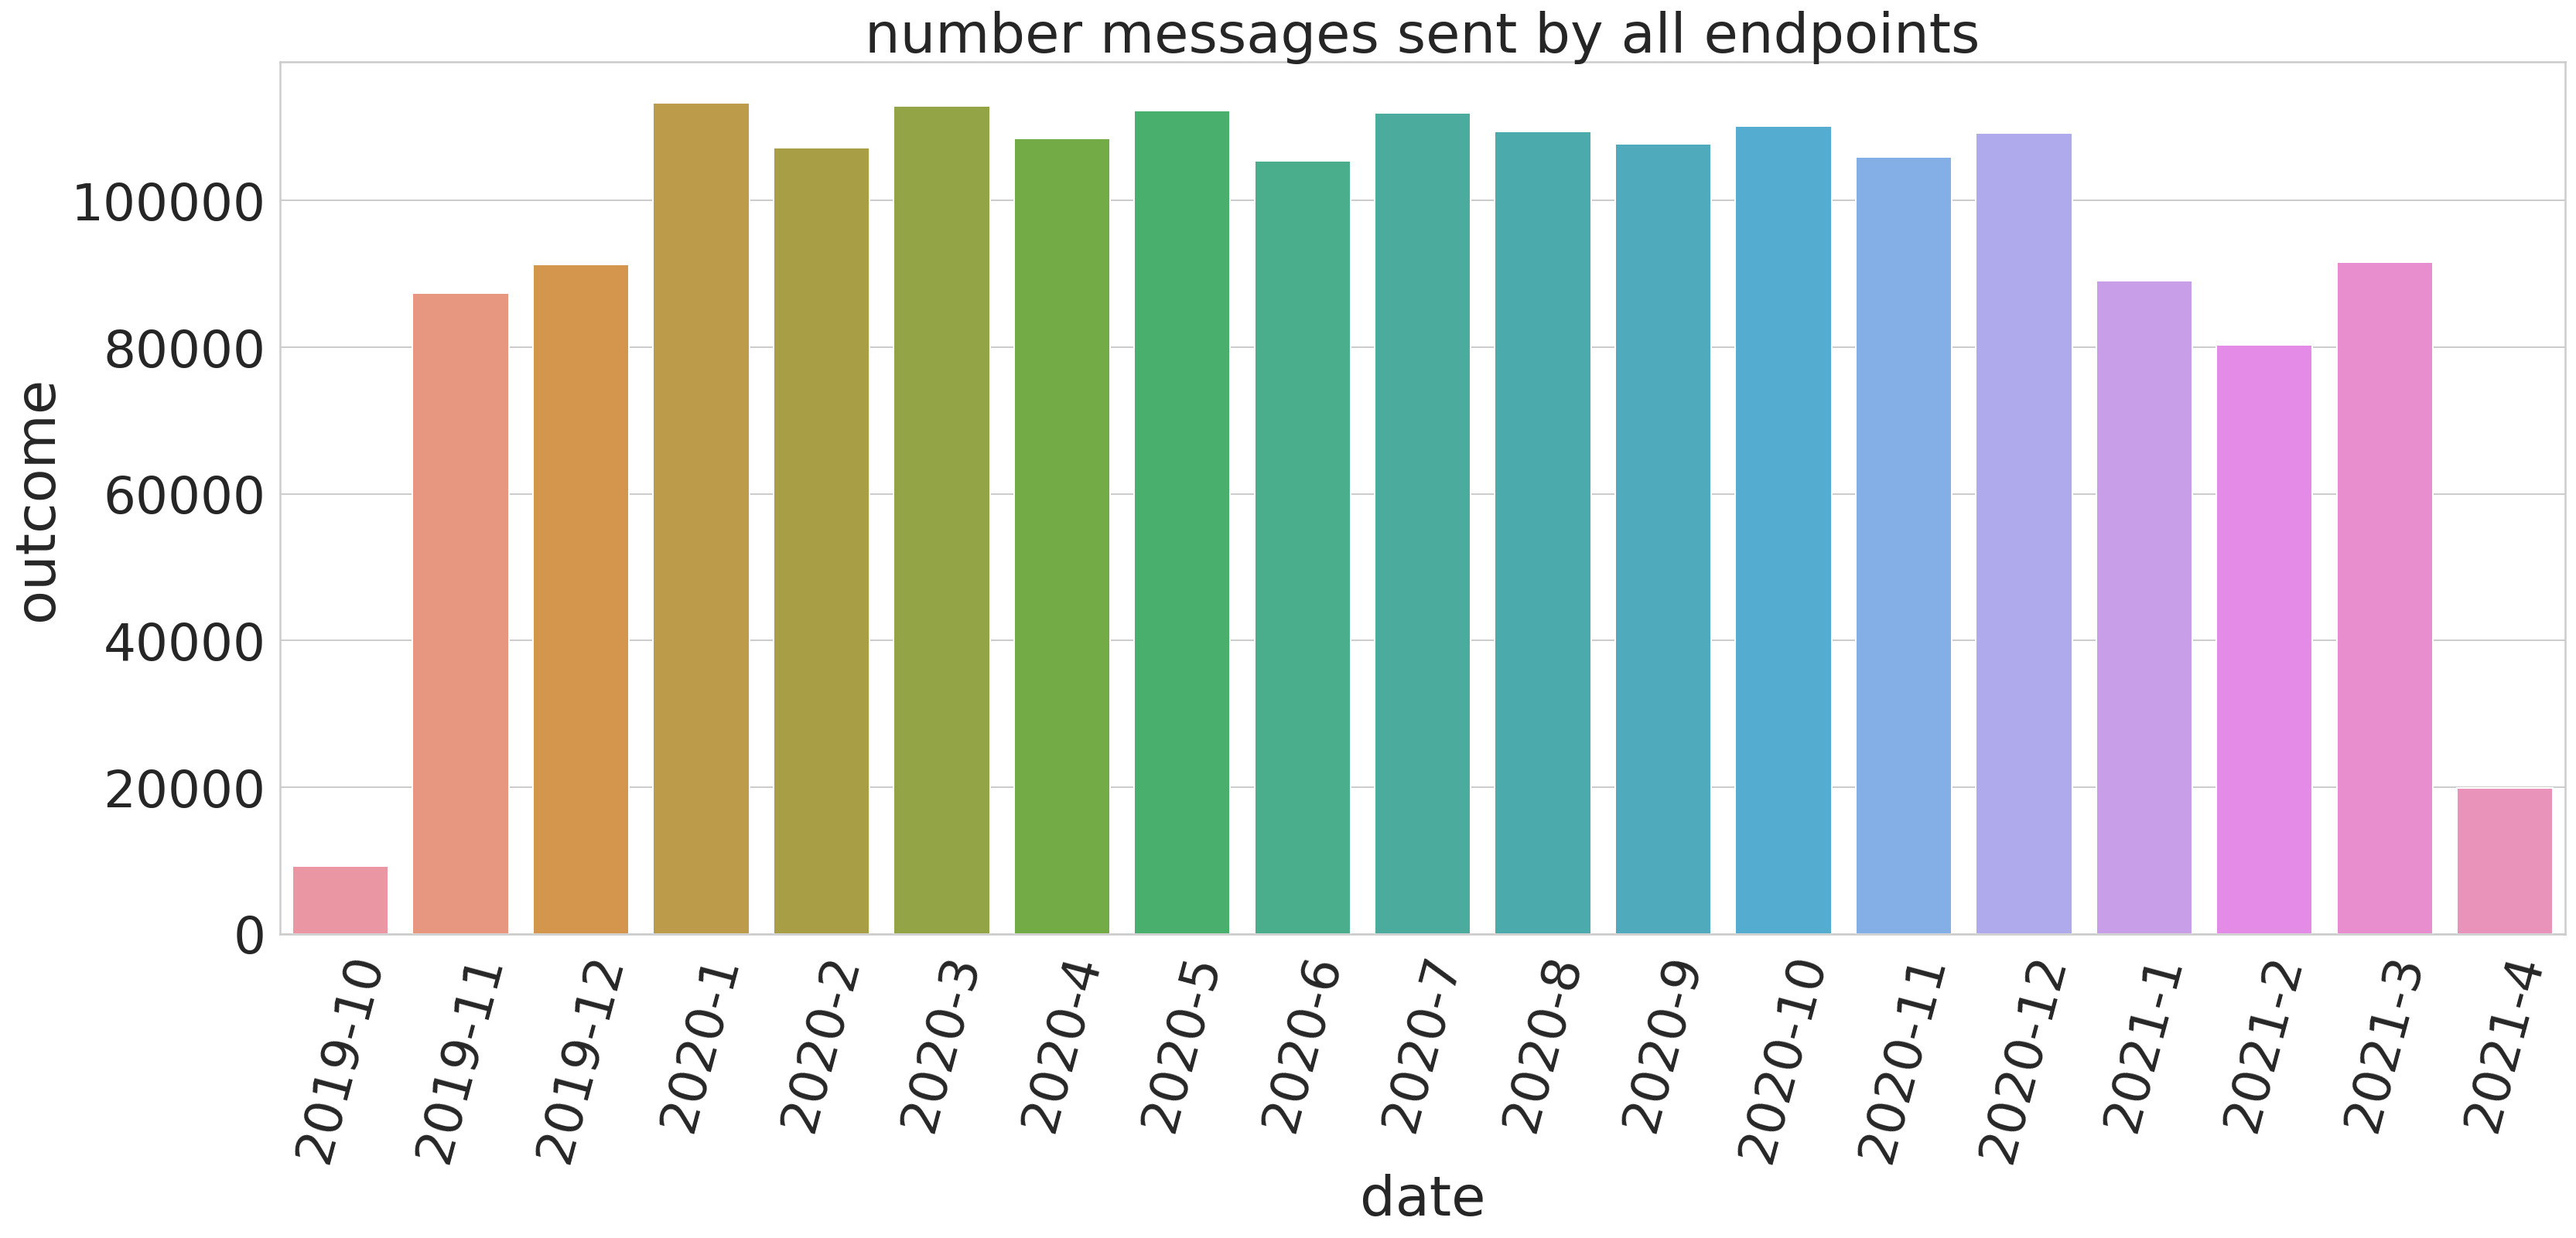

In [91]:
md = createData_ym(pfall,0)
ax=createBarplot(md,24,12,3.0,title="number messages sent by all endpoints")
#label(ax,1000,90)

In [ ]:
md = createData_ymd(pfall,6)
ax=createBarplot(md,24,12,3.0,title="number messages sent by all endpoints")
label(ax,1000,90)

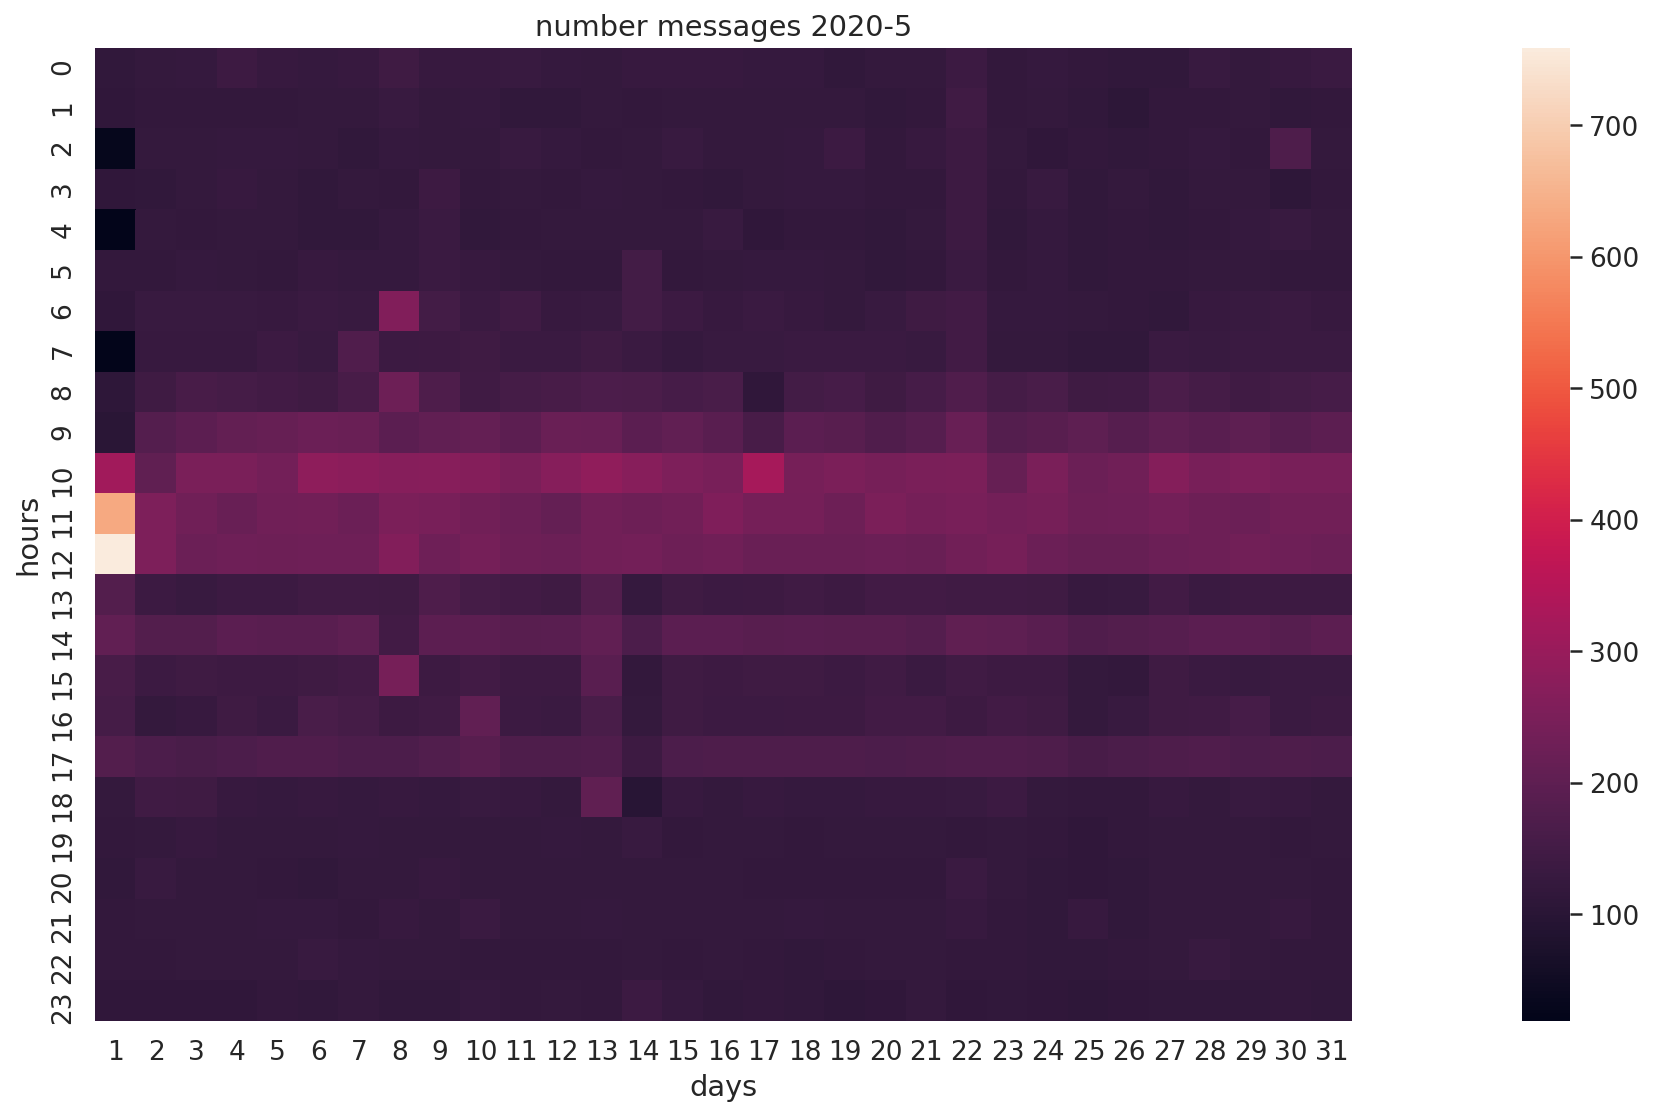

<AxesSubplot:title={'center':'number messages 2020-5'}, xlabel='days', ylabel='hours'>

In [92]:
data2 = createData(pfall,7)
piv = pd.pivot_table(data2, values="outcome",index=["hours"], columns=["days"], fill_value=0)
#titlestring = "CSENDERENDPOINTID: " + str(topsender.iloc[7]['CSENDERENDPOINTID']) + ": "+ category + " so far = " + str(topsender.iloc[7]['outcome']) + " , month: " + str(month) 
#titlestring = "CSENDERENDPOINTID: " + str(topsender.iloc[7]['CSENDERENDPOINTID']) + ": "+ category  + " month: " + str(month) 
titlestring ="number messages 2020-5"
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
createHeatmap(piv, titlestring)

In [ ]:
pfall = pd.read_parquet('/tmp/msgsenders_0702.parquet', engine='fastparquet')

In [ ]:
#pfall = pfall.sort_values('CSTARTTIME').reset_index() 
pfall
#len (pfall)

# Time Series Anomaly Detection with LSTM Autoencoders (selected sender)

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [61]:
# functions


# setup data (current)
def createDataframe(pfall) :
    data3 = createData(pfall,0)
    df = pd.DataFrame()
    df[OUTCOME] = data3['outcome']
    df.set_index(data3['date'], inplace=True)
    return df

def getTrainAndTest(df,TRAIN_SIZE) :
    train_size = int(len(df) * TRAIN_SIZE)
    test_size = len(df) - train_size
    train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
    print("train.shape: ",train.shape, "test.shape: ", test.shape)
    return train, test

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

def initmodel():
    model = keras.Sequential()
    model.add(keras.layers.LSTM(
        units=64, 
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
    model.add(keras.layers.LSTM(units=64, return_sequences=True))
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))
    model.compile(loss='mae', optimizer='adam')
    return model

def testScoreDF(model, THRESHOLD) : 
    X_test_pred = model.predict(X_test)
    test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

    test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
    test_score_df['loss'] = test_mae_loss
    test_score_df['threshold'] = THRESHOLD
    test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
    test_score_df[OUTCOME] = test[TIME_STEPS:][OUTCOME]
    return test_score_df

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
#pd.unique(mdcountsall[1].index.get_level_values(0))
TOP=500000
TOP=5000
result = pfall.groupby(['CSENDERENDPOINTID']).count()
data2 = pd.DataFrame()
data2['date'] = result.index.get_level_values(0).astype(str)
data2['outcome'] =  result['CSTARTTIME'].astype(int)
topsender =  data2[data2['outcome'] > TOP].sort_values('outcome').reset_index()
topsender.columns = ['index', 'CSENDERENDPOINTID', 'outcome']
topsender['outcome'] = topsender['outcome'].astype(int)
topsender

In [ ]:
data2

In [ ]:
#pfall
result = pfall.groupby(['CSENDERENDPOINTID']).count()
data2 = pd.DataFrame()
data2['date'] = result.index.get_level_values(0).astype(str)
data2['outcome'] =  result['CSTARTTIME'].astype(int)

In [ ]:
result.loc[9]['CGLOBALMESSAGEID'],len(pfall[pfall['CSENDERENDPOINTID'] == 9])

In [ ]:
senders = pd.unique(pfall['CSENDERENDPOINTID']) 
len(senders)

In [ ]:
pfall[pfall['CSENDERENDPOINTID'] == sender].sort_values('CSTARTTIME').reset_index() 

In [ ]:
#sender = 2191
sender = 1512
pfall1 = pfall[pfall['CSENDERENDPOINTID'] == sender].sort_values('CSTARTTIME').reset_index() 

def get_datestr(row):
    return str(row.day) + "." + str(row.month) + "." + str(row.year) 


pfall1


In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10


In [ ]:
#pfall.columns
df.head

In [93]:
pfall1 = pfall.sort_values(['year','month','day','hour']).reset_index()
del pfall1['index']
del pfall1['CGLOBALMESSAGEID']

# anomaly

In [96]:
df1

,close
date,
2019-10-29-5,97
2019-10-29-6,111
2019-10-29-7,65
2019-10-29-8,207
2019-10-29-9,178
...,...
2021-4-7-6,129
2021-4-7-7,152
2021-4-7-8,130


In [95]:
OUTCOME = 'close'

#TIME_STEPS = 1
#TIME_STEPS = 24
TIME_STEPS = 30
#TIME_STEPS = 720
#TIME_STEPS = 168
#TIME_STEPS = 336

from sklearn.preprocessing import StandardScaler

df1 = createDataframe(pfall1)
train, test = getTrainAndTest(df1,0.85)

scaler = StandardScaler()
scaler = scaler.fit(train[[OUTCOME]])
train[OUTCOME] = scaler.transform(train[[OUTCOME]])
test[OUTCOME] = scaler.transform(test[[OUTCOME]])

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train[[OUTCOME]], train.close, TIME_STEPS)
X_test, y_test = create_dataset(test[[OUTCOME]], test.close, TIME_STEPS)
print(X_train.shape)

model = initmodel()

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    shuffle=False)

X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

train.shape:  (10602, 1) test.shape:  (1871, 1)


<ipython-input-95-68565e91721c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[OUTCOME] = scaler.transform(train[[OUTCOME]])
<ipython-input-95-68565e91721c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[OUTCOME] = scaler.transform(test[[OUTCOME]])


(10572, 30, 1)
Epoch 1/10
298/298 [==============================] - 13s 34ms/step - loss: 0.1769 - val_loss: 0.1170
Epoch 2/10
298/298 [==============================] - 9s 31ms/step - loss: 0.1403 - val_loss: 0.0975
Epoch 3/10
298/298 [==============================] - 9s 31ms/step - loss: 0.1273 - val_loss: 0.0940
Epoch 4/10
298/298 [==============================] - 9s 30ms/step - loss: 0.1243 - val_loss: 0.0894
Epoch 5/10
298/298 [==============================] - 9s 30ms/step - loss: 0.1199 - val_loss: 0.0904
Epoch 6/10
298/298 [==============================] - 9s 30ms/step - loss: 0.1183 - val_loss: 0.0873
Epoch 7/10
298/298 [==============================] - 9s 30ms/step - loss: 0.1150 - val_loss: 0.0851
Epoch 8/10
298/298 [==============================] - 9s 30ms/step - loss: 0.1106 - val_loss: 0.0850
Epoch 9/10
298/298 [==============================] - 9s 30ms/step - loss: 0.1180 - val_loss: 0.0933
Epoch 10/10
298/298 [==============================] - 9s 30ms/step - loss:

In [97]:
len(X_train), len(y_train), len(X_test), len(y_test)

(10572, 10572, 1841, 1841)

In [ ]:
len(train), len(test)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


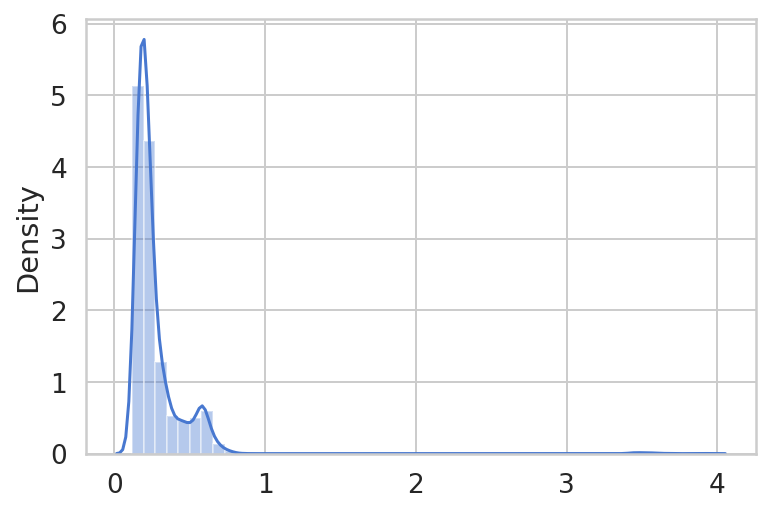

In [100]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [101]:
test_score_df = testScoreDF(model, 0.8)
anomalies     = test_score_df[test_score_df.anomaly == True]

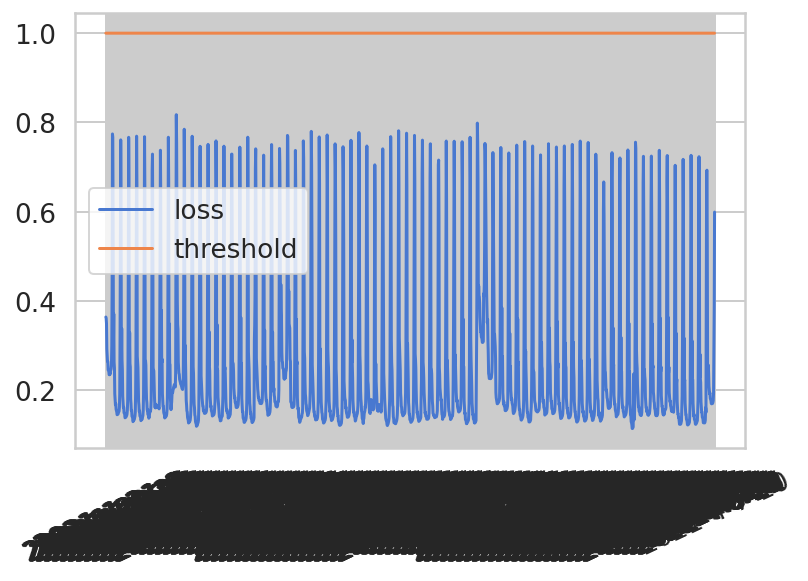

In [99]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'endpoint (sending) : 0 ( trained: 2019-10-29-5 -- 2021-1-19-7 )')

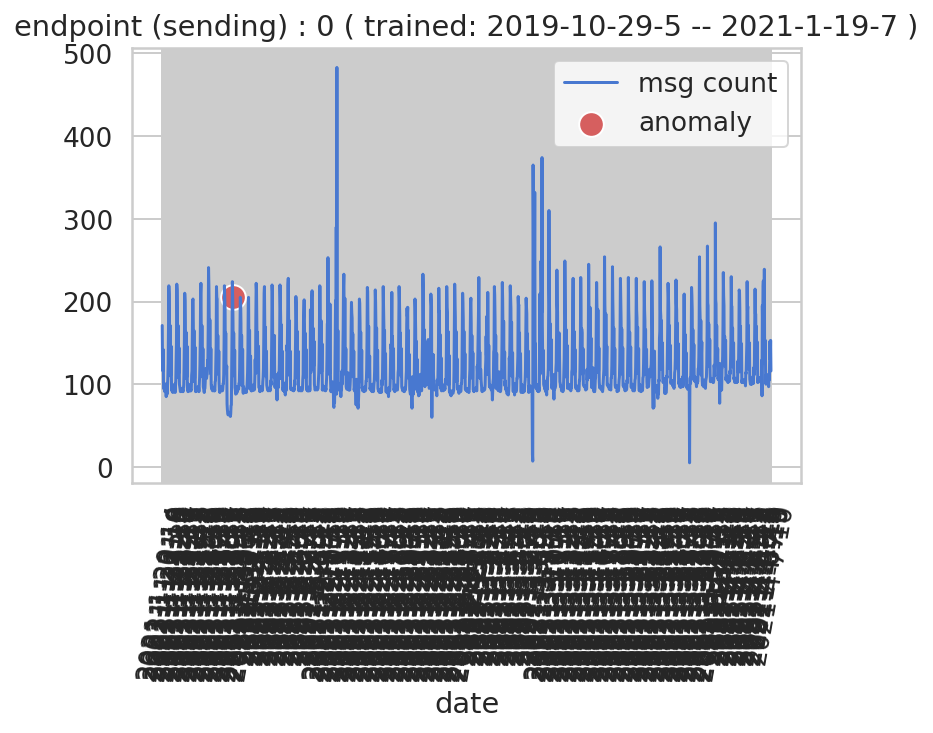

In [102]:
sender = 0

plt.plot(
  test[TIME_STEPS:].index, 
  scaler.inverse_transform(test[TIME_STEPS:].close), 
  label='msg count'
);

ax = sns.scatterplot(
  anomalies.index,
  scaler.inverse_transform(anomalies.close),
  color=sns.color_palette()[3],
  s=152,
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend();

label(ax,5,80)

titlestring ="endpoint (sending) : " + str(sender) + " ( trained: " +  train.index[0] + " -- " + train.index[len(train.index)-1] + " )"

plt.title(titlestring)

In [ ]:
#pfall[pfall['CSENDERENDPOINTID'] == 1774].reset_index().to_csv('/tmp/1774.csv', sep=';')
#pfall


# old

In [ ]:
len(pfall['CGLOBALMESSAGEID'].drop_duplicates())

In [ ]:
len(pfall['CGLOBALMESSAGEID'])

In [ ]:
pfall[pfall['CGLOBALMESSAGEID'] == '5ace4183-9e8f-11ea-b980-22fcac1e100b']
columns = df.limit(1).toPandas().columns
columns

In [ ]:
columns = df.limit(1).toPandas().columns
withoutColumns = ['timestamp', 'value','schemaid', 'hashvalue']
columns = columns[~columns.isin(withoutColumns)]

In [ ]:
#
schemas = dfcolumnSeries('schemaid').toPandas()['schemaid']
igroups = dfcolumnSeries('igroup').toPandas()['igroup']

schemaidCount  = dfcolumnCount('schemaid')
hashvalueCount = dfcolumnCount('hashvalue')
igroupCount = dfcolumnCount('igroup')
print('schemaidCount: ',schemaidCount,'hashvalueCount: ',hashvalueCount,'igroupCount: ',igroupCount)

In [ ]:
hashes = getIgroupHashes(6)

In [ ]:
_hash = hashes[10]
staticfeatureset = getStaticFeatures(_hash)

In [ ]:
relatedhashes = pd.unique(pfall[eval1(pfall)]['hashvalue'])
relatedhashes

In [ ]:
def getDataForRelatedHashes(relatedhashes):
    data2 = pd.DataFrame()
    start = True
    for hash_ in relatedhashes:
        c1 =  getDFvalueWithHash(int(hash_))
        if start:
            data2['date'] = c1['timestamp']
            start = False
        data2[str(hash_)] =  c1['value']
    return data2

In [ ]:
data = getDataForRelatedHashes(relatedhashes)
len(data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.lineplot(data=data2.iloc[:, :2])
sns.lineplot(data=data.iloc[:, 1:])

In [ ]:
data

In [ ]:
filteredrows = pfall[pfall['igroup'] == 6]

len(filteredrows)
hashes = pd.unique(filteredrows['hashvalue'])

In [ ]:
import numpy as np
getMissingSchemaids(pfall,hashes)

In [ ]:
data2 = pd.DataFrame()
#pfm = getDFvalueWithHash(int(relatedhashes[0]))
#
data2['date'] = dt['timestamp'].astype(str)
data2['value'] = dt['value']

In [ ]:
#hashes_d = dfcolumnSeries('hashvalue').toPandas()['hashvalue']
hashes_d = df.select(['hashvalue','schemaid']).dropDuplicates().toPandas()

In [ ]:
len(pd.unique(hashes_d['hashvalue']))


In [ ]:
#len(pd.unique(hashes_d))


dt = getDFvalueWithHash(int(hashes_d['schemaid'][0]),int(hashes_d['hashvalue'][0]))


In [ ]:
# check, if it is unique
len(dt['timestamp']), len(dt)

In [ ]:
len(pd.unique(pfall['hashvalue']))

In [ ]:
print(len(hashes))
len(pd.unique(pfall['hashvalue']))

In [ ]:
#getInfoForSchemas(filteredrows)
#len(pd.unique(filteredrows['__name__']))
#getEncoder('__name__').inverse_transform(pd.unique(filteredrows['__name__']))

In [ ]:
pfall[(pfall['schemaid'] == 1629035211) & (pfall['timestamp'] == 1587819506)]

In [ ]:
#getEncoder('igroup').inverse_transform(igroups)
for igroup in igroups:
    filteredrows = pfall[pfall['igroup'] == igroup]
    count = len(pd.unique(filteredrows['inode']))
    if count > 1:
        print(getEncoder('igroup').inverse_transform([igroup]),igroup,count)

In [ ]:
for hash_ in hashes:
    metric = filteredrows[filteredrows['hashvalue']==hash_]
    count = len(pd.unique(metric['value']))
    if count > 3:
        print(hash_,count)

In [ ]:
#continue with hash
#_hash=-2018833881
_hash=-283862276

In [ ]:
# !!!!!!!!!!! missing schemas
getMissingSchemaids(pfall)

In [ ]:
filteredrows[filteredrows['hashvalue'] == _hash]
filteredrows[filteredrows['hashvalue'] == _hash][featurecolumns].iloc[0]['__name__']

In [ ]:


#['schemaid','igroup']

#filteredrows[featurecolumns].head()
#getVariableUniqueColums(filteredrows[featurecolumns])

# there are still too many columns for _hash
#len(getVariableUniqueColums(filteredrows[featurecolumns]))
#len(featurecolumns)


# there are no variable columns left
#getVariableUniqueColums(filteredrows[filteredrows['hashvalue'] == _hash][featurecolumns])

# static feature values for metric _hash

#staticfeatureset[featurecolumns[1]]
#staticfeatureset


#featurecolumns

In [ ]:
currenthash     = int(relatedhashes[1])
currentfeatures = filteredrows[filteredrows['hashvalue'] == currenthash].iloc[0]
currentfeatures['igroup'],currentfeatures['inode'],currentfeatures['hashvalue'],getEncoder('__name__').inverse_transform([currentfeatures['__name__']])[0]

In [ ]:
pfm

In [ ]:
#data2 = data2.sort_values('date').reset_index()
c1

In [ ]:
data2

In [ ]:
ax = createLineplot(data2,16,10,1.4,title="",skip=500)
label(ax,10,90)

In [ ]:
data2.iloc[2]

In [ ]:
pfall.head()

In [ ]:
filteredrows[featurecolumns].head()

In [ ]:
# find out variable columns and type of value
#getVariableUniqueColums(pfm)
#selected = ['timestamp', 'value','year','month', 'day', 'hour', 'minute']

#which inode is used by metri hashvalue
used_inode = filteredrows[filteredrows['hashvalue'] == _hash]['inode'].iloc[0]

# other inodes for the igroup
inodes_igroup = pd.unique(filteredrows[filteredrows['igroup'] == 6]['inode'])
otherinodes = inodes_igroup[inodes_igroup!=used_inode]

#
pd.unique(filteredrows[filteredrows['igroup'] == 6]['__name__'])
pd.unique(filteredrows[(filteredrows['igroup'] == 6) & (filteredrows['__name__'] == 309)]['logical_system'])

In [ ]:
filteredrows[filteredrows['inode'] == inodes_igroup[0]]['hashvalue']


In [ ]:

        
metric = filteredrows[filteredrows['hashvalue']==_hash]
#metric = filteredrows[filteredrows['hashvalue']==hashes[0]]
#usedcolumns(metric)

keep = getVariableUniqueColums(metric)
#keepcolumns(dataall,keep)
#keep
len(metric),len(pd.unique(metric['value'])), pd.unique(metric['value'])
metric

In [ ]:
pfall1 = pfall[pfall['schemaid'] == schemas[0]]
mdcountsall = pfall1.groupby(['igroup','hashvalue'])
#['igroup'].count() 
#data2 = pd.DataFrame()
mdcountsall

In [ ]:
getEncoder('__name__').inverse_transform([pfall1.iloc[0]['__name__']])[0]

In [ ]:
def createData(pfall,month,outcome) :
    if outcome < 2 :
        mdcountsall = pfall[(pfall['month'] == month) & (pfall['outcome'] == outcome)].groupby(['year','month','day','hour'])['outcome'].count()
    else :
        if (month > 0) & (month < 13) :
            mdcountsall = pfall[(pfall['month'] == month)].groupby(['year','month','day','hour'])['outcome'].count()
        else :
            mdcountsall = pfall.groupby(['year','month','day','hour'])['outcome'].count()    
    a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(a,b,c,d)
    data2['outcome'] =  mdcountsall.reset_index()['outcome'].astype(int) 

    #for pivot table
    data2['hours'] =  d.astype(int) 
    data2['days']  =  c.astype(int) 
    piv = pd.pivot_table(data2, values="outcome",index=["hours"], columns=["days"], fill_value=0)
    return data2

In [ ]:
pfall.head()

In [ ]:
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"   
#!conda install -y -c conda-forge fastparquet
!pip install tensorflow

# Rest

In [ ]:
FileSystem.get(sparkSession.hadoopConfiguration).listFiles('hdfs://172.30.17.145:8020/sla_sql_data/1580137124017', true)

#path.getFileSystem(sparkSession.hadoopConfiguration).listFiles(hdfs://172.30.17.145:8020/sla_sql_data/, true)

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = 'hdfs://172.30.17.145:8020/sla_sql_data/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
import esutil as eu
eu.hdfs.ls(hdfs_url='hdfs://172.30.17.145:8020/sla_sql_data/1580137124017', recurse=False, full=False)

In [ ]:
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"   
!pip install hdfs

In [ ]:
!pip install esutil

In [ ]:
from hdfs import Config
client = Config().get_client('dev')
client.list('/*')

In [ ]:
from hdfs import Config
client = Config().get_client('dev')
mypath = 'hdfs://172.30.17.145:8020/sla_sql_data/1580137124017'
files = client.list(mypath)

In [ ]:
with open("/home/jovyan/.hdfscli.cfg", "w") as file:
    file.write("[global]\n") 
    file.write("default.alias = dev\n") 
    file.write("[dev.alias]\n") 
    file.write("url = https://172.30.17.145:8020\n") 
    file.write("user = admin\n") 